# Linear Regression Continued

For these exercises, you will use the titanic dataset from the seaborn library.


## Ex. 1

Make a linear regression model that predicts passenger fare based on "class" and "sex". 

Steps:

* Prior to making the model, drop the "deck" column as it is mostly NaNs. 
* Make a plot that visualises the relationship between the predictors and the outcome
* Remove any *extreme* outliers.
* Report the coefficents of the model. Interpret the coefficients. 
* Report the training and testing scores. (Set random state equal to 42 when splitting into training/testing)




In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import seaborn as sns

/Users/jd/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jd/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 48.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


,survived,pclass,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alive,alone,sex_male,class_Second,class_Third
0,0,3,22.0,1,0,7.2500,S,man,True,Southampton,no,False,1,0,1
1,1,1,38.0,1,0,71.2833,C,woman,False,Cherbourg,yes,False,0,0,0
2,1,3,26.0,0,0,7.9250,S,woman,False,Southampton,yes,True,0,0,1
3,1,1,35.0,1,0,53.1000,S,woman,False,Southampton,yes,False,0,0,0
4,0,3,35.0,0,0,8.0500,S,man,True,Southampton,no,True,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,man,True,Southampton,no,True,1,1,0
887,1,1,19.0,0,0,30.0000,S,woman,False,Southampton,yes,True,0,0,0
888,0,3,NaN,1,2,23.4500,S,woman,False,Southampton,no,False,0,0,1
889,1,1,26.0,0,0,30.0000,C,man,True,Cherbourg,yes,True,1,0,0


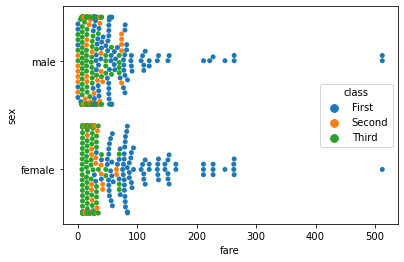

In [42]:


titanic = sns.load_dataset("titanic")

titanic.drop('deck',axis = 1, inplace=True)



sns.swarmplot(data = titanic, x = 'fare', y = 'sex', hue = 'class' )

titanic.loc[titanic['fare'] > 400]

titanic.drop(index = [258,679,737], inplace = True)

titanic = pd.get_dummies(data =titanic, columns = ["sex", 'class'],drop_first = True)
titanic


In [40]:
X = titanic[["sex_male", 'class_Second', 'class_Third']]
Y = titanic['fare'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

linear = LinearRegression(fit_intercept=True) 
linear.fit(X_train,Y_train)
training_score = linear.score(X_train,Y_train)


preds_linear = linear.predict(X_test) 

rsquared_linear = r2_score(Y_test,preds_linear)


print("Coefficients are",np.round(linear.coef_, 2))
print("The training score is", np.round(training_score,2))
print("Testing score is",np.round(rsquared_linear, 2))

### Expected fare cost is $13.15 less if you are male, $59.17 less for second class, and $64.47 less for third class

Coefficients are [-13.15 -59.17 -64.47]
The training score is 0.44
Testing score is 0.48


## Ex. 2

Make a logistic regression model that predicts passenger survival based on "sex" and "class".

Steps:
* Reload the data to start fresh.
* Make a plot (barplot) that visualises the relationship between the predictors and the outcome
* Report the coefficents of the model.
* Interpret the coefficients.
* Report the training and testing accuracies.(Set random state equal to 42 when splitting into training/testing)

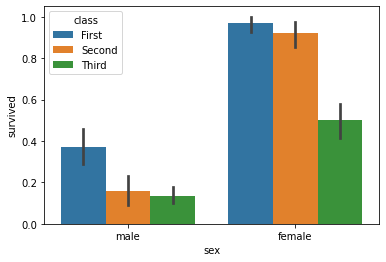

In [57]:
from sklearn.linear_model import LogisticRegression

titanic = sns.load_dataset("titanic")

titanic.drop('deck',axis = 1, inplace=True)

sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = titanic)
titanic = pd.get_dummies(data =titanic, columns = ["sex", 'class'],drop_first = True)

In [60]:


X = titanic[["sex_male", 'class_Second', 'class_Third']]
Y = titanic['survived'] 


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) 
logistic.fit(X_train,Y_train) 


print("Coefficients are",np.round(np.exp(logistic.coef_), 2))

###Being male decreases odds of survival by a factor of 0.08-1 = 92%, second class decreases odds of survival by
#0.6-1 = 40%, third class decreases odds of survival by 0.19-1 = 81%

Coefficients are [[0.08 0.6  0.19]]


In [68]:
pred_probs = logistic.predict_proba(X_train) #get predicted probabilities 
pred_probs = pd.DataFrame(pred_probs)
pred_probs["class"] = np.where(pred_probs[1] > 0.5, 1, 0)
pred_probs["true"] = Y_train.reset_index().survived
pred_probs

from sklearn.metrics import accuracy_score

print('training score is', accuracy_score(pred_probs['true'],pred_probs['class']))

training score is 0.7879213483146067


In [69]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_class'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().survived
print('testing score is', accuracy_score(test_preds['true'],test_preds['test_class']))

testing score is 0.7821229050279329


In [ ]:
###Pretty accurate model for determining whether a passenger survived. Both the training and test scores are relatively high.